/home/pl5189/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


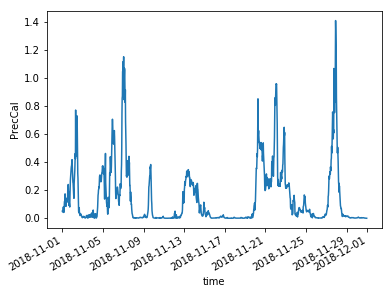

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

ds = xr.open_dataset("/data/GPM_HIM8/GPM_201811.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

(<xarray.DataArray 'B8' ()>
 array(256.38333, dtype=float32),
 <xarray.DataArray 'B8' ()>
 array(256.38333, dtype=float32))

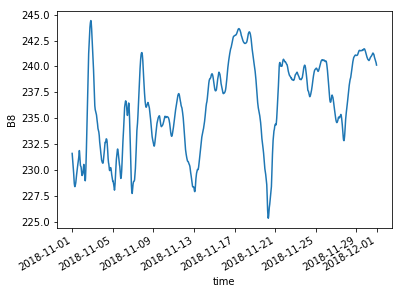

In [2]:
ds = xr.open_dataset("/data/GPM_HIM8/HIM8_201811.nc")

ds.B8.mean(dim=['x','y']).plot()

ds.B8.max(),ds.B8.max()

<xarray.DataArray 'B14' ()>
array(327.18985, dtype=float32)

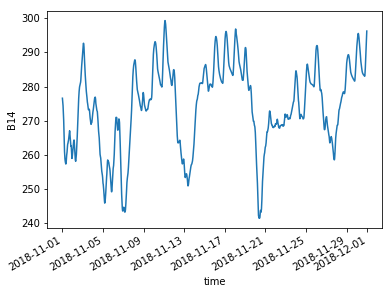

In [11]:
ds.B14.mean(dim=['x','y']).plot()
ds.B14.max()

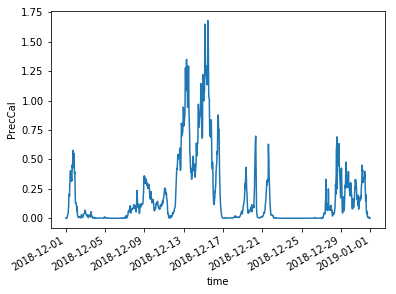

In [6]:
ds = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

<xarray.DataArray 'B8' ()>
array(257.4802, dtype=float32)

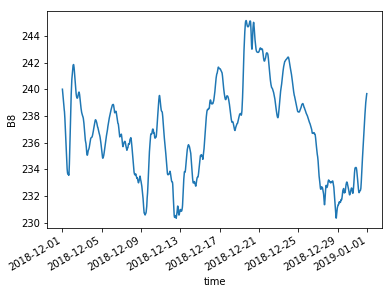

In [19]:
ds = xr.open_dataset("/data/GPM_HIM8/HIM8_201812.nc")

ds.B8.mean(dim=['x','y']).plot()
ds.B8.max()

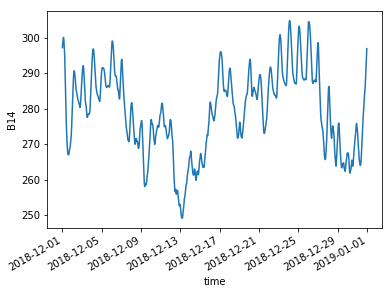

In [9]:
ds.B14.mean(dim=['x','y']).plot()


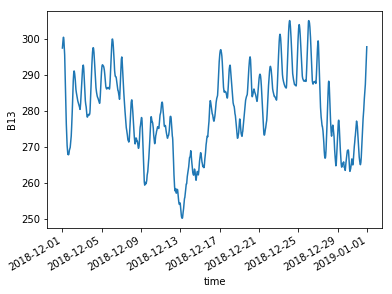

In [20]:
ds.B13.mean(dim=['x','y']).plot()

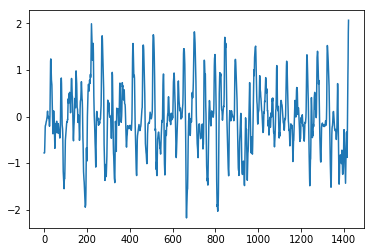

In [17]:


plt.plot(np.gradient(ds.B14.mean(dim=['x','y']).values))

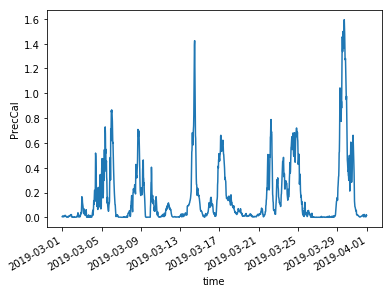

In [3]:
ds = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

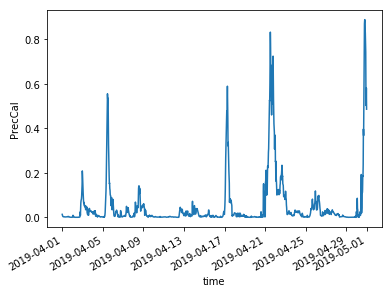

In [4]:
ds = xr.open_dataset("/data/GPM_HIM8/GPM_201904.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

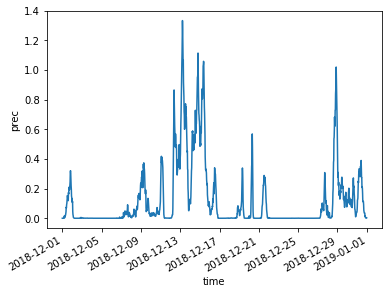

In [8]:
ds = xr.open_dataset("conv_out.nc")

ds.prec.mean(dim=['x','y']).plot()

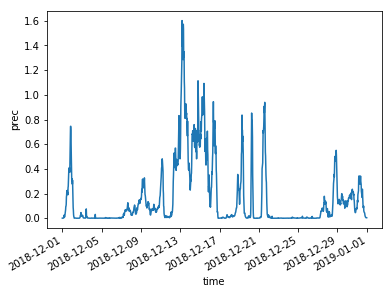

In [9]:
ds = xr.open_dataset("mse_out.nc")

ds.prec.mean(dim=['x','y']).plot()

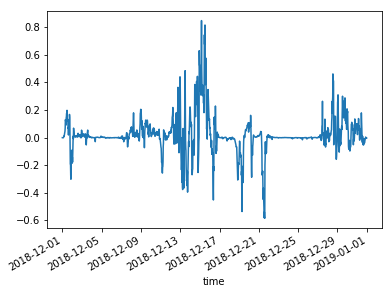

In [10]:
gpm = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")
mse = xr.open_dataset("mse_out.nc")

(gpm.PrecCal.mean(dim=['x','y'])-mse.prec.mean(dim=['x','y'])).plot()

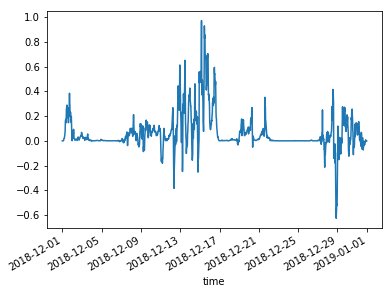

In [11]:
gpm = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")
mse = xr.open_dataset("conv_out.nc")

(gpm.PrecCal.mean(dim=['x','y'])-mse.prec.mean(dim=['x','y'])).plot()

201811
(3, 1435)


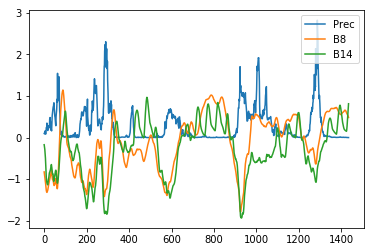

In [30]:
dates = ["201811","201901","201902","201903","201904"]

for date in dates:
    print(date)
    dsh = xr.open_dataset("/data/GPM_HIM8/HIM8_{}.nc".format(date))
    b8 = (dsh.B8.mean(dim=['x','y']).values-237)/6.5
    b14 = (dsh.B14.mean(dim=['x','y']).values-280)/20
    
    dsg = xr.open_dataset("/data/GPM_HIM8/GPM_{}.nc".format(date))
    prec = dsg.PrecCal.sel(time=dsh.time).mean(dim=['x','y']).values*2
    
    stack = np.vstack((prec,b8,b14))
    print(stack.shape)

    [a,b,c] = plt.plot(stack.T)
    
    plt.legend([a,b,c], ["Prec","B8","B14"], loc=1)
    break

In [ ]:
193,257
190,331

mu=237 sigma=6.5
mu=280 sigma=20

In [33]:
dates = ["201811","201812","201901","201902","201903","201904"]

for date in dates:
    print(date)
    dsh = xr.open_dataset("/data/GPM_HIM8/HIM8_{}.nc".format(date))
    dsg = xr.open_dataset("/data/GPM_HIM8/GPM_{}.nc".format(date))
    print(np.setdiff1d(dsg.time.values, dsh.time.values))


201811
['2018-11-07T20:30:00.000000000' '2018-11-18T20:30:00.000000000'
 '2018-11-22T20:00:00.000000000' '2018-11-22T20:30:00.000000000'
 '2018-11-23T08:00:00.000000000']
201812
['2018-12-07T00:30:00.000000000' '2018-12-07T12:30:00.000000000'
 '2018-12-07T20:30:00.000000000' '2018-12-17T03:30:00.000000000'
 '2018-12-31T02:30:00.000000000']
201901
['2019-01-01T21:00:00.000000000' '2019-01-01T21:30:00.000000000'
 '2019-01-01T22:00:00.000000000' '2019-01-01T22:30:00.000000000'
 '2019-01-01T23:00:00.000000000' '2019-01-01T23:30:00.000000000'
 '2019-01-02T00:00:00.000000000' '2019-01-02T00:30:00.000000000'
 '2019-01-02T01:00:00.000000000' '2019-01-02T01:30:00.000000000'
 '2019-01-02T02:00:00.000000000' '2019-01-02T02:30:00.000000000'
 '2019-01-02T03:00:00.000000000' '2019-01-02T03:30:00.000000000'
 '2019-01-02T04:00:00.000000000' '2019-01-02T04:30:00.000000000'
 '2019-01-02T05:00:00.000000000' '2019-01-03T22:30:00.000000000'
 '2019-01-04T10:30:00.000000000' '2019-01-07T12:30:00.000000000'
 

201812
(3, 1483)


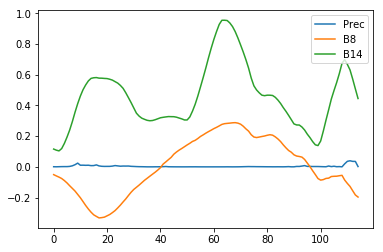

In [8]:
dates = ["201812","201901","201902","201903","201904"]

for date in dates:
    print(date)
    dsh = xr.open_dataset("/data/GPM_HIM8/HIM8_{}.nc".format(date))
    b8 = (dsh.B8.mean(dim=['x','y']).values-237)/6.5
    b14 = (dsh.B14.mean(dim=['x','y']).values-280)/20
    
    dsg = xr.open_dataset("/data/GPM_HIM8/GPM_{}.nc".format(date))
    prec = dsg.PrecCal.sel(time=dsh.time).mean(dim=['x','y']).values*2
    
    stack = np.vstack((prec,b8,b14))
    print(stack.shape)

    [a,b,c] = plt.plot(stack.T[180:295,:])
    
    plt.legend([a,b,c], ["Prec","B8","B14"], loc=1)
    break

201812
(3, 1483)


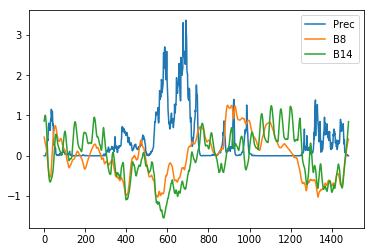

In [9]:
dates = ["201812","201901","201902","201903","201904"]

for date in dates:
    print(date)
    dsh = xr.open_dataset("/data/GPM_HIM8/HIM8_{}.nc".format(date))
    b8 = (dsh.B8.mean(dim=['x','y']).values-237)/6.5
    b14 = (dsh.B14.mean(dim=['x','y']).values-280)/20
    
    dsg = xr.open_dataset("/data/GPM_HIM8/GPM_{}.nc".format(date))
    prec = dsg.PrecCal.sel(time=dsh.time).mean(dim=['x','y']).values*2
    
    stack = np.vstack((prec,b8,b14))
    print(stack.shape)

    [a,b,c] = plt.plot(stack.T)
    
    plt.legend([a,b,c], ["Prec","B8","B14"], loc=1)
    break